In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Que-1

 It should be noted that the kNN algorithm thrives on data i.e. it does much better with larger number of training points. Indeed kNN is a universally consistent learning algorithm. So we are not going to remove missing value obersevations; instead try to find suitable value for these missing values.

#### Q1: train a k-nearest neighbors regression model, and report its validation set performance using root mean squared error. 

In [2]:
col_names=['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
           'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
           'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
data=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data",names=col_names)

In [3]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


it is clear that we have some missing values. First we will avoid qualitative type features and deal with missing values in numeric type features. In https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.names file we can see that there are 11 numeric features that are continous. 

In [5]:
numeric_cont=['normalized-losses', 'wheel-base', 'length', 'width', 
                      'height', 'curb-weight', 'bore', 'stroke', 'compression-ratio', 
                      'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
data_numeric=data[numeric_cont]
data_numeric.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450


In [11]:
data_numeric.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

There is no N/A values in this data set. But there are missing values that needs to be filled. To see how many missing values(?) there are in features.

In [6]:
data_numeric['normalized-losses'].value_counts()

?      41
161    11
91      8
150     7
134     6
128     6
104     6
102     5
85      5
95      5
74      5
103     5
65      5
168     5
94      5
122     4
106     4
148     4
93      4
118     4
101     3
115     3
154     3
125     3
83      3
137     3
89      2
194     2
188     2
164     2
129     2
119     2
192     2
158     2
145     2
81      2
108     2
197     2
87      2
153     2
113     2
110     2
256     1
77      1
121     1
231     1
142     1
78      1
186     1
107     1
98      1
90      1
Name: normalized-losses, dtype: int64

We can replace '?' with N/A and then count how many are there in each feature column.

In [7]:
data_numeric.replace('?', np.nan, inplace=True)

/home/sunild/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4379: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [8]:
data_numeric.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [9]:
data_numeric.dtypes

normalized-losses     object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [10]:
object_dtypes=['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']
data_numeric[object_dtypes]=data_numeric[object_dtypes].astype(float)
data_numeric.dtypes

/home/sunild/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


normalized-losses    float64
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [11]:
data_numeric.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,NaN,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,164.0,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,164.0,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [12]:
data_numeric=data_numeric.fillna(data_numeric.mean())

#### normalization

In [13]:
data_norm=(data_numeric-data_numeric.min())/(data_numeric.max()-data_numeric.min())
data_norm['price']=data_numeric['price']
data_norm.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.316667,0.083333,0.411171,0.664286,0.290476,0.1250,0.262500,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.316667,0.083333,0.411171,0.664286,0.290476,0.1250,0.262500,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.433333,0.383333,0.517843,0.100000,0.666667,0.1250,0.441667,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.491667,0.541667,0.329325,0.464286,0.633333,0.1875,0.225000,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.508333,0.541667,0.518231,0.464286,0.633333,0.0625,0.279167,0.551020,0.138889,0.157895,17450.0


- First we are going to use only numeric features just to easy our distance calucation problems. 
- Euclidean distance/Manhattan distance. :: Euclid
- Equi-weighted/exp-weighted. :: Equi
- 70:30 split for train:val.
- In 1.a pick k=7. and for 1.b use cross-validation with RMSE as being metric-value to find best k.

In [14]:
def split(full_data,chunk):
    #randomization
    np.random.seed(17817735)
    index_rand=np.random.permutation(full_data.index)
    full_data_rand=full_data.reindex(index_rand)
    #splitting
    train_data=full_data_rand.iloc[0:int(len(full_data_rand)*chunk)]
    val_data=full_data_rand.iloc[int(len(full_data_rand)*chunk):]
    return {'val_data': val_data, 'train_data': train_data}

def knn_predict(k_value,train_data,val_data,regressors):
    predicted_prices=np.zeros(len(val_data))
    for i in range(len(val_data)):
        dist=np.zeros(len(train_data))
        train_data=pd.DataFrame(train_data)
        val_data=pd.DataFrame(val_data)
        for j in range(len(train_data)):
            dist[j]=np.linalg.norm(train_data.iloc[j,0:13]-val_data.iloc[i,0:13])
        sorted_index=np.argsort(dist)
        for k in range(k_value):
            predicted_prices[i]=predicted_prices[i]+train_data[["price"]].iloc[sorted_index[k]]        
    predicted_prices=predicted_prices/k_value        
    RMSE=np.sqrt(np.mean((predicted_prices-val_data['price'])**2))
    #print(predicted_prices)
    #print(val_data['price'])
    return round(RMSE,2)

k=7
regressor_features= ['normalized-losses', 'wheel-base', 'length', 'width', 
                      'height', 'curb-weight', 'bore', 'stroke', 'compression-ratio', 
                      'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg']

split_data=split(data_norm,0.7)
train_data=split_data['train_data']
val_data=split_data['val_data']

rmse=knn_predict(k,train_data,val_data,regressor_features)
print(rmse)

5174.13


**find an optimal k for this model using cross-validation**

We need to try bunch of k values and see which one gives lowest RMSE.

In [15]:
k_values=[1,2,3,4,5,6,7,8,9,10]
rmses=np.zeros(len(k_values))
for k in k_values:
    rmses[k-1]=knn_predict(k,train_data,val_data,regressor_features)

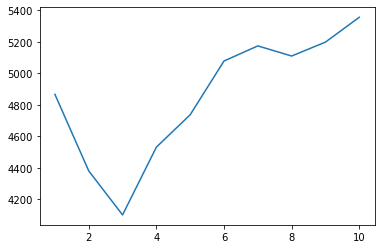

In [16]:
plt.plot(k_values,rmses)
plt.show()

**k=3** gives lowest RMSE. Why RMSE increases with k value increase?

**Introduce L0 regularization into this setup and retrain the model**

**check whether L0 regularization improves generalization and which are the most important
features identified by the model for predicting prices. Comment on your findings drawing upon real-
world intuitions about car prices.**

One way to find best features is to consider one at a time and see which ones give low RSME. 

We could use correlation between numeric constant features to prune repeats.

In [25]:
data_norm.iloc[:,0:13].corr()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
normalized-losses,1.000000,-0.056518,0.019209,0.084195,-0.370706,0.097785,-0.029266,0.054929,-0.114525,0.203434,0.237748,-0.218749,-0.178221
wheel-base,-0.056518,1.000000,0.874587,0.795144,0.589435,0.776386,0.488760,0.160944,0.249786,0.351957,-0.360704,-0.470414,-0.544082
length,0.019209,0.874587,1.000000,0.841118,0.491029,0.877728,0.606462,0.129522,0.158414,0.554434,-0.287031,-0.670909,-0.704662
width,0.084195,0.795144,0.841118,1.000000,0.279210,0.867032,0.559152,0.182939,0.181129,0.642195,-0.219859,-0.642704,-0.677218
height,-0.370706,0.589435,0.491029,0.279210,1.000000,0.295572,0.171101,-0.055351,0.261214,-0.110137,-0.320602,-0.048640,-0.107358
curb-weight,0.097785,0.776386,0.877728,0.867032,0.295572,1.000000,0.648485,0.168783,0.151362,0.750968,-0.266283,-0.757414,-0.797465
bore,-0.029266,0.488760,0.606462,0.559152,0.171101,0.648485,1.000000,-0.055909,0.005201,0.575737,-0.254761,-0.584508,-0.586992
stroke,0.054929,0.160944,0.129522,0.182939,-0.055351,0.168783,-0.055909,1.000000,0.186105,0.088264,-0.066844,-0.042179,-0.043961
compression-ratio,-0.114525,0.249786,0.158414,0.181129,0.261214,0.151362,0.005201,0.186105,1.000000,-0.205740,-0.435936,0.324701,0.265201
horsepower,0.203434,0.351957,0.554434,0.642195,-0.110137,0.750968,0.575737,0.088264,-0.205740,1.000000,0.130971,-0.803162,-0.770903


# Que-2

**train a decision tree classification model using information gain as the splitting criterion and
using only single feature decision stumps at all non-leaf nodes and majority votes at leaf nodes, and
report its validation set performance using % accuracy (15 points)**

Here first try to define all required functions so that we can play with different hyperparameters in next part. Basic definition of all function is given in comments.

In [37]:
# function that splits training data into train and validation set
def train_spliter(df,chunk):
    #randomization
    np.random.seed(17817735)
    index_rand=np.random.permutation(df.index)
    df_rand=df.reindex(index_rand)
    #splitting
    train_df=df_rand.iloc[0:int(len(df_rand)*chunk)]
    val_df=df_rand.iloc[int(len(df_rand)*chunk):]
    return train_df, val_df

In [38]:
#function to check purity of leaf/internal node
def is_it_pure(data):
    income_labels = data[:,-1]
    unique_level=np.unique(income_labels)
    if len(unique_level)==1:
        return True
    else:
        return False
    

In [39]:
#function to give majority label
def max_label(data):
    income_labels = data[:,-1]
    unique_level,unique_count=np.unique(income_labels,return_counts=True)
    max_index=unique_count.argmax()
    return unique_level[max_index]
    

In [40]:
#function to get possible splits in data
def possible_splits(data):
    splits={}
    _,n=data.shape
    for col_index in range(n-1):
        points=data[:,col_index]
        unique_points=np.unique(points)
        splits[col_index]=unique_points
    return splits

In [41]:
#function to get entropy
def getEntropy(data):
    income_labels = data[:,-1]
    _,unique_count=np.unique(income_labels,return_counts=True)
    p=unique_count/unique_count.sum()
    entropy=sum(p*-np.log2(p))
    return entropy

In [42]:
#function to get IG
def IG(data_left,data_right):
    total=len(data_left)+len(data_right)
    p_left=len(data_left)/total
    p_right=len(data_right)/total
    IG_value=p_left*getEntropy(data_left)+p_right*getEntropy(data_right)
    return IG_value

In [43]:
#function to get type of features: are they continuous or categorical
def feature_type(df):
    feature=[]
    unique_thersh=15
    for f in df.columns:
        if f!="label":
            unique_points=df[f].unique()
            ex_point=unique_points[0]
            if(isinstance(ex_point,str)) or (len(unique_points) <= unique_thersh):
                feature.append("categorical")
            else:
                feature.append("continuous")
                
    return feature

In [44]:
#function that splits data into two parts based on splits
def decision_split(data,col_index,point):
    split_point=data[:,col_index]
    type_of_feature = FEATURE_TYPES[col_index]
    if type_of_feature=="continuous":
        data_left=data[split_point<=point]
        data_right=data[split_point>point]
    else:
        data_left=data[split_point==point]
        data_right=data[split_point!=point]
    return data_left,data_right

In [45]:
#function to get best split based on IG
def best_IG_split(data,splits):
    foo=True
    for col_index in splits:
        for point in splits[col_index]:
            data_left,data_right=decision_split(data,col_index,point)
            IG_value=IG(data_left,data_right)
            if foo or IG_value<=best_IG:
                foo=False
                best_IG=IG_value
                best_split_col=col_index
                best_split_point=point
    #print(COLUMN_HEADERS[best_split_col])
    return best_split_col, best_split_point

In [46]:
#Main decision algorithm
def decision_tree(df,c=0,min_points=4,max_height=4):
    
    #making data suitable for functions
    if c==0:
        global COLUMN_HEADERS, FEATURE_TYPES
        COLUMN_HEADERS=df.columns
        FEATURE_TYPES=feature_type(df)
        data=df.values
    else:
        data=df
        
    #check for basic case
    if (is_it_pure(data)) or (len(data) < min_points) or (c==max_height):
        return max_label(data)
    
    #making recursive tree
    else:
        c=c+1
        
        splits=possible_splits(data)
        best_split_col, best_split_point=best_IG_split(data,splits)
        data_left,data_right=decision_split(data,best_split_col,best_split_point)
        
        # to check that nodes are not empty
        if len(data_left)==0 or len(data_right)==0:
            return max_label(data)
        
        #to get best split feature
        feature_names=COLUMN_HEADERS[best_split_col]
        feat_type=FEATURE_TYPES[best_split_col]
        if feat_type== "continuous":
            que="{} <= {}".format(feature_names,best_split_point)#to represent tree nicely
        else:
            que="{} = {}".format(feature_names,best_split_point)
        
        #cummulative sub tree
        sub_tree={que:[]}
        
        #recusrsive decision tree formulation
        y=decision_tree(data_left,c,min_points,max_height)
        N=decision_tree(data_right,c,min_points,max_height)
        
        #if both y and N are same then we don't point in asking the que
        if y==N:
            sub_tree=y
        else:
            sub_tree[que].append(y)
            sub_tree[que].append(N)
        return sub_tree

In [47]:
#function to predict one point at a time
def predict_one(exa,tree):
    
    #if tree is root node
    if not isinstance(tree,dict):
        return tree
    
    ques=list(tree.keys())[0]
    feature_names,operator,best_split_point=ques.split(" ")
    
    #ask the question for prediction
    if operator=="<=":
        if exa[feature_names]<=float(best_split_point):
            ans=tree[ques][0]
        else:
            ans=tree[ques][1]
    else:
        if str(exa[feature_names])==best_split_point:
            ans=tree[ques][0]
        else:
            ans=tree[ques][1]
    #to check basic case
    if not isinstance(ans,dict):
        return ans
    #otherwise we recurse
    else:
        remain_of_tree=ans
        return predict_one(exa,remain_of_tree)

In [48]:
#for making prediction on all points
def predict(df,tree):
    if len(df)!=0:
        pred_incomes=df.apply(predict_one,args=(tree,),axis=1)
    else:
        pred_incomes=pd.Series()
    return pred_incomes

In [49]:
#to calculate % accuracy
def accuracy(df,tree):
    pred_incomes=predict(df,tree)
    correct=pred_incomes==df.label
    accu=correct.mean()
    #print(len(pred_incomes))
    #print(pred_incomes)
    return accu

In [50]:
df=pd.read_csv("adult.csv")
df['label']=df.income
df.replace('?',np.nan,inplace=True)

Three features nativecountry, occupation, and workclass have missing values. All these can be replaces by most occuring value in the column. Or we can also drop these rows.

In [51]:
mode_workclass=df.workclass.mode()[0]
mode_occupation=df.occupation.mode()[0]
mode_nativecountry=df['native.country'].mode()[0]
df=df.fillna({"workclass":mode_workclass,"occupation":mode_occupation,"native.country":mode_nativecountry})
df.loc[df['native.country']!='United-States', 'native.country']='Other'
df=df.drop(["income","fnlwgt"],axis=1) #to make implementation faster

Be aware that training this dataset takes around 10 minutes :) when I did not **drop fnlgwt** variable. After dropping it is **10 times faster**. 

In [52]:
np.random.seed(0)
train_df, val_df = train_spliter(df, 0.7)
tree = decision_tree(train_df,max_height=5)

In [57]:
round(accuracy(val_df, tree),2)

0.85

**use cross-validation to optimize the tree hyperparameters (10 points)**

We can run algorithm for some heights and see which one gives better accuracy.

In [58]:
#to get optimum value of tree_height:
for n in range(3,15):
    train_df, val_df = train_spliter(df, 0.7)
    tree = decision_tree(train_df,max_height=n)
    accu=round(accuracy(val_df,tree),2)
    print(accu)

0.85
0.85
0.85
0.85
0.85
0.86
0.85
0.86
0.86
0.86
0.86
0.85


for n>=3 this gives about same accuracy. So **height =3** is good enough.

**Improve on the best test set performance this classifier has to offer with a better version that
uses more complex splitting criteria than single-feature decision stumps (10 points)**


In [61]:
#to get test accuracy
test=pd.read_csv("test.csv")
test['label']=test.income
test.replace(' NaN',np.nan,inplace=True)
mode_workclass=test.workclass.mode()[0]
mode_occupation=test.occupation.mode()[0]
mode_nativecountry=test['native.country'].mode()[0]
test=test.fillna({"workclass":mode_workclass,"occupation":mode_occupation,"native.country":mode_nativecountry})
test.loc[test['native.country']!=' United-States', 'native.country']='Other'
test=test.drop(["income"],axis=1)

In [86]:
accuracy(test,tree)

0.0

That is unfortunate :(. Something is amiss but time is running.